In [2]:
from collections import defaultdict
import math
import numpy as np
from numpy import ma
import datetime, time
from datetime import datetime
import netCDF4
from netCDF4 import Dataset, num2date
from scipy.interpolate import griddata

import TomTom
import TomTom.Mesh_maker as Mesh_maker
import TomTom.Functions as Functions
import TomTom.Calc_path as Calc_path

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature


from scipy.spatial import Delaunay
import pickle

name_textfile_load = 'D:/DCSM-FM/A06_pieter/Roadmap_Neightbourlayers=1,Vship=0,WD_min=1.4'

with open(name_textfile_load, 'rb') as input:
    Roadmap = pickle.load(input)
  
t0 = '01/07/2013 06:30:00'
start = (53.049453, 5.044149)
stop = (53.294684, 5.191655)
vship = 5

path, time = TomTom.RODFF_time(start, stop, t0, vship, Roadmap)


plt.plot(path[:,1], path[:,0])
plt.plot(path[:,1], path[:,0], 'r.')

In [ ]:
class flow_2D_FM_100m_tot():
    def __init__(self):      
        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0008_map.nc'
        b = -35
        
        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][:b]
        y = nc.variables['mesh2d_face_y'][:b]
        WD1 = nc.variables['mesh2d_waterdepth'][:,:b]
        u1 = nc.variables['mesh2d_ucx'][:,:b]
        v1 = nc.variables['mesh2d_ucy'][:,:b]
        nodes1 = np.zeros((len(x),2))
        nodes1[:,0] = y
        nodes1[:,1] = x

        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0009_map.nc'
        a = 13
        b = -101
        
        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][a:b]
        y = nc.variables['mesh2d_face_y'][a:b]
        WD2 = nc.variables['mesh2d_waterdepth'][:,a:b]
        u2 = nc.variables['mesh2d_ucx'][:,a:b]
        v2 = nc.variables['mesh2d_ucy'][:,a:b]
        nodes2 = np.zeros((len(x),2))
        nodes2[:,0] = y
        nodes2[:,1] = x

        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0018_map.nc'
        b = -173
        
        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][:b]
        y = nc.variables['mesh2d_face_y'][:b]
        WD3 = nc.variables['mesh2d_waterdepth'][:,:b]
        u3 = nc.variables['mesh2d_ucx'][:,:b]
        v3 = nc.variables['mesh2d_ucy'][:,:b]
        nodes3 = np.zeros((len(x),2))
        nodes3[:,0] = y
        nodes3[:,1] = x

        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0013_map.nc'
        a = -20000
        b = -200
        
        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][a:b]
        y = nc.variables['mesh2d_face_y'][a:b]
        WD4 = nc.variables['mesh2d_waterdepth'][:,a:b]
        u4 = nc.variables['mesh2d_ucx'][:,a:b]
        v4 = nc.variables['mesh2d_ucy'][:,a:b]
        nodes4 = np.zeros((len(x),2))
        nodes4[:,0] = y
        nodes4[:,1] = x

        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0007_map.nc'
        b = -300
        
        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][:b]
        y = nc.variables['mesh2d_face_y'][:b]
        WD5 = nc.variables['mesh2d_waterdepth'][:,:b]
        u5 = nc.variables['mesh2d_ucx'][:,:b]
        v5 = nc.variables['mesh2d_ucy'][:,:b]
        nodes5 = np.zeros((len(x),2))
        nodes5[:,0] = y
        nodes5[:,1] = x

        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0019_map.nc'
        b = -12533
        
        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][:b]
        y = nc.variables['mesh2d_face_y'][:b]
        WD6 = nc.variables['mesh2d_waterdepth'][:,:b]
        u6 = nc.variables['mesh2d_ucx'][:,:b]
        v6 = nc.variables['mesh2d_ucy'][:,:b]
        nodes6 = np.zeros((len(x),2))
        nodes6[:,0] = y
        nodes6[:,1] = x
        
        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0006_map.nc'
        a = -19000 + 149 
        b = -5649

        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][a:b]
        y = nc.variables['mesh2d_face_y'][a:b]
        WD7 = nc.variables['mesh2d_waterdepth'][:,a:b]
        u7 = nc.variables['mesh2d_ucx'][:,a:b]
        v7 = nc.variables['mesh2d_ucy'][:,0:b]
        nodes7 = np.zeros((len(x),2))
        nodes7[:,0] = y
        nodes7[:,1] = x
        
        t = nc.variables['time'][:]
        t0 = "22/12/2012 00:00:00"
        d = datetime.strptime(t0, "%d/%m/%Y %H:%M:%S")
        t0 = d.timestamp()
        self.t = t+t0

        nodes = np.concatenate((nodes1, nodes2, nodes3, nodes4, nodes5, nodes6, nodes7), axis = 0)
        WD = np.concatenate((WD1, WD2, WD3, WD4, WD5, WD6, WD7), axis = 1)
        u = np.concatenate((u1, u2, u3, u4, u5, u6, u7), axis = 1)
        v = np.concatenate((v1, v2, v3, v4, v5, v6, v7), axis = 1)
        
        idx = np.unique(nodes, axis = 0, return_index=True)[1]
        
        self.nodes = nodes[idx]
        self.WD = WD[:,idx]
        self.u = u[:,idx]
        self.v = v[:,idx]
        
        self.tria = Delaunay(self.nodes)

In [ ]:
start_time = time.time()

flow = flow_2D_FM_100m_tot()

stop_time = time.time()
computation_time = stop_time - start_time
print("the computational time is:", round(computation_time,2), "sec")

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())


ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))


plt.plot(flow.nodes[:,1],flow.nodes[:,0],'r.', markersize = 0.1, transform=ccrs.PlateCarree())

print(len(flow.nodes))

In [ ]:
nl = (1,1)
dx_min = 0.05
blend = 0.8

In [ ]:
start_time = time.time()

nodes_index, LS = TomTom.Mesh_maker.Get_nodes(flow, nl, dx_min, blend)

TomTom.save_object(nodes_index, 'nodes_index_FM100m')
TomTom.save_object(LS, 'LS_FM100m')

stop_time = time.time()
computation_time = stop_time - start_time
print("the computational time is:", round(computation_time,2), "sec")

In [ ]:
nodes = flow.nodesess[nodes_index]

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())


ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))


plt.plot(nodes[:,1],nodes[:,0],'r.', markersize = 0.1, transform=ccrs.PlateCarree())

print(len(flow.nodes))

In [ ]:
class flow_reduced():
    def __init__(self, flow, nodes_index):
        self.nodes = flow.nodes[nodes_index]
        self.WD = flow.WD[nodes_index]
        self.u = flow.u[nodes_index]
        self.v = flow.v[nodes_index]

In [ ]:
flow_red = flow_reduced(flow, nodes_index)

TomTom.save_object(flow_red, 'flow_red')

In [2]:
class flow_2D_FM3():
    def __init__(self):      
        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0006_map.nc'
        a = -19000 + 149 
        b = -5649

        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][a:b]
        y = nc.variables['mesh2d_face_y'][a:b]
        WD7 = nc.variables['mesh2d_waterdepth'][:,a:b]
        u7 = nc.variables['mesh2d_ucx'][:,a:b]
        v7 = nc.variables['mesh2d_ucy'][:,0:b]
        nodes7 = np.zeros((len(x),2))
        nodes7[:,0] = y
        nodes7[:,1] = x


        name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0019_map.nc'
        b = -12533

        nc = Dataset(name)
        x = nc.variables['mesh2d_face_x'][:b]
        y = nc.variables['mesh2d_face_y'][:b]
        WD6 = nc.variables['mesh2d_waterdepth'][:,:b]
        u6 = nc.variables['mesh2d_ucx'][:,:b]
        v6 = nc.variables['mesh2d_ucy'][:,:b]
        nodes6 = np.zeros((len(x),2))
        nodes6[:,0] = y
        nodes6[:,1] = x

        nodes = np.concatenate((nodes6, nodes7), axis = 0)
        WD = np.concatenate((WD6, WD7), axis = 1)
        u = np.concatenate((u6, u7), axis = 1)
        v = np.concatenate((v6, v7), axis = 1)

        idx = np.unique(nodes, axis = 0, return_index=True)[1]
        
        self.nodes = nodes[idx]
        self.WD = WD[:,idx]
        self.u = u[:,idx]
        self.v = v[:,idx]

        self.tria = Delaunay(self.nodes)

In [3]:
start_time = time.time()

flow = flow_2D_FM3()

stop_time = time.time()
computation_time = stop_time - start_time
print("the computational time is:", round(computation_time,2), "sec")

the computational time is: 176.88 sec


75186


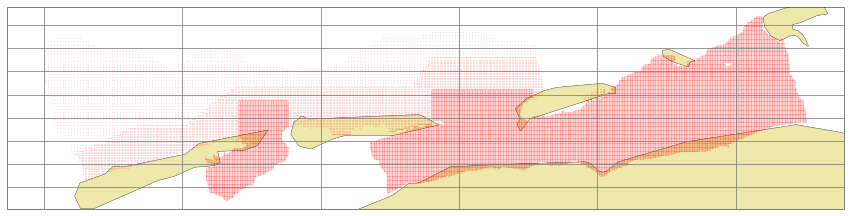

In [4]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())


ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))


plt.plot(flow.nodes[:,1],flow.nodes[:,0],'r.', markersize = 0.1, transform=ccrs.PlateCarree())

print(len(flow.nodes))

In [5]:
nl = (1,1)
dx_min = 0.05
blend = 0.8

In [6]:
start_time = time.time()

nodes_index, LS = TomTom.Mesh_maker.Get_nodes(flow, nl, dx_min, blend)

TomTom.save_object(nodes_index, 'nodes_index_FM100m')
TomTom.save_object(LS, 'LS_FM100m')

stop_time = time.time()
computation_time = stop_time - start_time
print("the computational time is:", round(computation_time,2), "sec")

0 75.186
1 75.186
2 75.186
3 75.186
4 75.186
5 75.186
6 75.186
7 75.186
8 75.186
9 75.186
10 75.186
11 75.186
12 75.186
13 75.186
14 75.186
15 75.186
16 75.186
17 75.186
18 75.186
19 75.186
20 75.186
21 75.186
22 75.186
23 75.186
24 75.186
25 75.186
26 75.186
27 75.186
28 75.186
29 75.186
30 75.186
31 75.186
32 75.186
33 75.186
34 75.186
35 75.186
36 75.186
37 75.186
38 75.186
39 75.186
40 75.186
41 75.186
42 75.186
43 75.186
44 75.186
45 75.186
46 75.186
47 75.186
48 75.186
49 75.186
50 75.186
51 75.186
52 75.186
53 75.186
54 75.186
55 75.186
56 75.186
57 75.186
58 75.186
59 75.186
60 75.186
61 75.186
62 75.186
63 75.186
64 75.186
65 75.186
66 75.186
67 75.186
68 75.186
69 75.186
70 75.186
71 75.186
72 75.186
73 75.186
74 75.186
the computational time is: 3545.96 sec


43.18564576337837


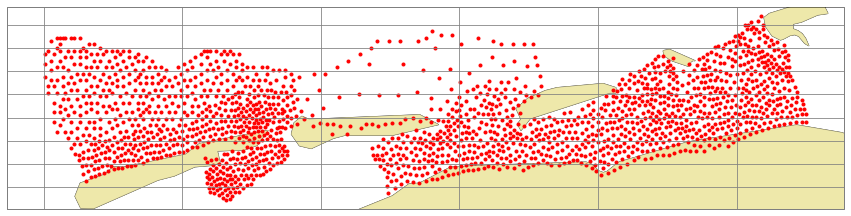

In [7]:
nodes = flow.nodes[nodes_index]

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())


ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))


plt.plot(nodes[:,1],nodes[:,0],'r.', transform=ccrs.PlateCarree())

print(len(nodes)**0.5)

In [8]:
# started 10:13  expected 1 hour calctime

In [45]:
name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0006_map.nc'
nc = Dataset(name)
print(nc.variables.keys())

odict_keys(['mesh2d', 'wgs84', 'mesh2d_node_x', 'mesh2d_node_y', 'mesh2d_node_z', 'mesh2d_edge_x', 'mesh2d_edge_y', 'mesh2d_edge_x_bnd', 'mesh2d_edge_y_bnd', 'mesh2d_edge_nodes', 'mesh2d_face_nodes', 'mesh2d_edge_faces', 'mesh2d_face_x', 'mesh2d_face_y', 'mesh2d_face_x_bnd', 'mesh2d_face_y_bnd', 'mesh2d_edge_type', 'mesh2d_flowelem_ba', 'mesh2d_flowelem_bl', 'mesh2d_flowelem_domain', 'mesh2d_flowelem_globalnr', 'time', 'timestep', 'mesh2d_s1', 'mesh2d_waterdepth', 'mesh2d_ucx', 'mesh2d_ucy', 'mesh2d_ucmag'])


In [63]:
name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0008_map.nc'
b = -35
x = nc.variables['mesh2d_face_x'][:b]
y = nc.variables['mesh2d_face_y'][:b]
ba = nc.variables['mesh2d_flowelem_bl'][:b]



name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0009_map.nc'
a = 13
b = -101

x2 = nc.variables['mesh2d_face_x'][a:b]
y2 = nc.variables['mesh2d_face_y'][a:b]
ba2 = nc.variables['mesh2d_flowelem_bl'][a:b]
x = np.concatenate((x,x2), axis = 0)
y = np.concatenate((y,y2), axis = 0)
ba = np.concatenate((ba,ba2), axis = 0)

name = 'D:/DCSM-FM_100m/A06_pieter/DCSM-FM_100m_0018_map.nc'
b = -173
x2 = nc.variables['mesh2d_face_x'][:b]
y2 = nc.variables['mesh2d_face_y'][:b]
ba2 = nc.variables['mesh2d_flowelem_bl'][:b]
x = np.concatenate((x,x2), axis = 0)
y = np.concatenate((y,y2), axis = 0)
ba = np.concatenate((ba,ba2), axis = 0)


In [64]:
x_r = np.arange(3.5,6.5, 0.001)
y_r = np.arange(53,55, 0.01)
y_r, x_r = np.meshgrid(y_r,x_r)

ba_r = griddata((x,y), ba, (x_r, y_r), method= 'cubic')

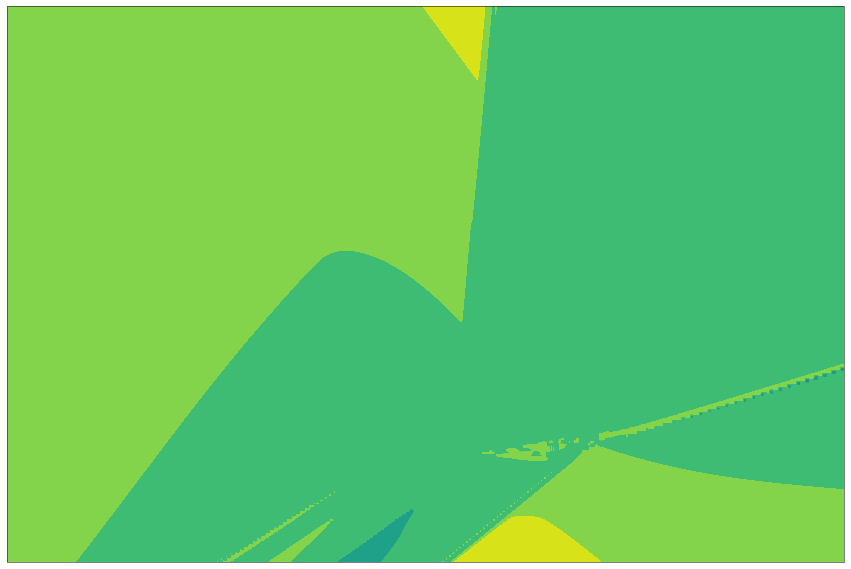

In [67]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.Mercator())

plt.contourf(x_r,y_r, ba_r, transform =ccrs.Mercator())

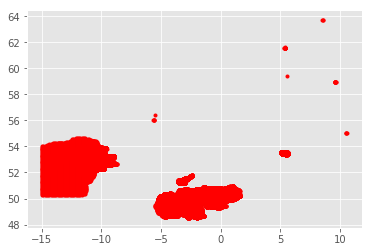

In [66]:
plt.plot(x2,y2,'r.')

In [62]:
x.shape

(149825,)